In [130]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler   
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier #Using MLPclassifier from sklearn
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten #search
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import math


In [131]:
train_data= pd.read_csv('C:\\Users\\HP\\Desktop\\data.csv')

In [132]:
feature_cols=['location',	'country' ,	'gender' ,	'age' ,	'vis_wuhan',	'from_wuhan',	'symptom1'	,'symptom2'	,'symptom3'	,'symptom4'	,'symptom5'	,'symptom6', 'diff_sym_hos']
x=train_data[feature_cols]
y=train_data.result
# Get 70% of the dataset as the training set. Put the remaining 30% in temporary variables: x_test and y_test.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)
# Split the 30% subset above into two: one half for cross validation and the other for the test set
x_validate, x_test, y_validate, y_test = train_test_split(x_test, y_test, test_size=0.50, random_state=1)

Results before tuning

In [164]:

clf_cv = MLPClassifier(random_state=1)
#Train the model using the training sets
clf_cv.fit(x_train, y_train)
#Predict the response on validation data 
y_pred_cv = clf_cv.predict(x_validate)
# Model Accuracy: how often is the classifier correct?
print("MLP classifier results:")
print("Accuracy:",metrics.accuracy_score(y_validate, y_pred_cv))
print("Precision:",metrics.precision_score(y_validate, y_pred_cv))
print("F1 score:",metrics.f1_score(y_validate, y_pred_cv))
print("Recall:",metrics.recall_score(y_validate, y_pred_cv))
print("ROC score:",metrics.roc_auc_score(y_validate, y_pred_cv))

MLP classifier results:
Accuracy: 0.8992248062015504
Precision: 0.6818181818181818
F1 score: 0.6976744186046512
Recall: 0.7142857142857143
ROC score: 0.8247354497354499


We start training our classifer and make manual tuning first 
1. Tune the hidden_layer_sizes

In [133]:

clf1_cv = MLPClassifier(hidden_layer_sizes=(5,5), max_iter=200,random_state=42)
#Train the model using the training sets
clf1_cv.fit(x_train, y_train)
#Predict the response on validation data 
y_pred_cv1 = clf1_cv.predict(x_validate)
# Model Accuracy: how often is the classifier correct?
print("MLP classifier results:")
print("Accuracy:",metrics.accuracy_score(y_validate, y_pred_cv1))
print("Precision:",metrics.precision_score(y_validate, y_pred_cv1))
print("F1 score:",metrics.f1_score(y_validate, y_pred_cv1))
print("Recall:",metrics.recall_score(y_validate, y_pred_cv1))
print("ROC score:",metrics.roc_auc_score(y_validate, y_pred_cv1))

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP classifier results:
Accuracy: 0.8372093023255814
Precision: 0.0
F1 score: 0.0
Recall: 0.0
ROC score: 0.5


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Trying to increase layers to 5  with relatively varying number of neurons

In [134]:

clf1 = MLPClassifier(batch_size=10, max_iter=250, hidden_layer_sizes=(12,12,12,8,3), random_state=42)
clf1.fit(x_train, y_train)
#Predicting y for X_val
y_pred1 = clf1.predict(x_test)
print("MLP classifier results:")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred1))
print("Precision:",metrics.precision_score(y_test, y_pred1))
print("F1 score:",metrics.f1_score(y_test, y_pred1))
print("Recall:",metrics.recall_score(y_test, y_pred1))
print("ROC score:",metrics.roc_auc_score(y_test, y_pred1))

MLP classifier results:
Accuracy: 0.9461538461538461
Precision: 0.7058823529411765
F1 score: 0.7741935483870968
Recall: 0.8571428571428571
ROC score: 0.9070197044334974


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


Make the number of layers 3 and compare the results -> it gives outstanding results

In [135]:

clf2 = MLPClassifier(batch_size=10,hidden_layer_sizes=(15,15,15), max_iter=200  ,random_state=42)
#Train the model using the training set
clf2.fit(x_train, y_train)
#Predict the response for test dataset
y_pred2 = clf2.predict(x_test)
# Model Accuracy: how often is the classifier correct?
print("MLP classifier results:")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))
print("Precision:",metrics.precision_score(y_test, y_pred2))
print("F1 score:",metrics.f1_score(y_test, y_pred2))
print("Recall:",metrics.recall_score(y_test, y_pred2))
print("ROC score:",metrics.roc_auc_score(y_test, y_pred2))

MLP classifier results:
Accuracy: 0.9692307692307692
Precision: 0.8571428571428571
F1 score: 0.8571428571428571
Recall: 0.8571428571428571
ROC score: 0.9199507389162562


Make two hidden layers and  vary in number of neurons 

In [167]:

 clf3 = MLPClassifier(hidden_layer_sizes=(15,15),max_iter=200,batch_size=10 ,random_state=42)
 #Train the model using the training sets
 clf3.fit(x_train, y_train)
 #Predict the response for test dataset
 y_pred3 = clf3.predict(x_test)
 # Model Accuracy: how often is the classifier correct?
 print("MLP classifier results:")
 print("Accuracy:",metrics.accuracy_score(y_test, y_pred3))
 print("Precision:",metrics.precision_score(y_test, y_pred3))
 print("F1 score:",metrics.f1_score(y_test, y_pred3))
 print("Recall:",metrics.recall_score(y_test, y_pred3))
 print("ROC score:",metrics.roc_auc_score(y_test, y_pred3))

MLP classifier results:
Accuracy: 0.9769230769230769
Precision: 1.0
F1 score: 0.88
Recall: 0.7857142857142857
ROC score: 0.8928571428571428


Add the learning_rate_init to be 0.01 and make other hyperparameters constant

In [137]:
clf4 = MLPClassifier(hidden_layer_sizes=(12,12), learning_rate_init=0.01, max_iter=250 , activation='relu',random_state=42) 

clf4.fit(x_train, y_train)
#Predict the response for test dataset
y_pred4 = clf4.predict(x_test)
 # Model Accuracy: how often is the classifier correct?
print("MLP classifier results:")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred4))
print("Precision:",metrics.precision_score(y_test, y_pred4))
print("F1 score:",metrics.f1_score(y_test, y_pred4))
print("Recall:",metrics.recall_score(y_test, y_pred4))
print("ROC score:",metrics.roc_auc_score(y_test, y_pred4))

MLP classifier results:
Accuracy: 0.9
Precision: 0.5384615384615384
F1 score: 0.5185185185185186
Recall: 0.5
ROC score: 0.7241379310344829


Change the activation function to be logistic

In [138]:
clf5 = MLPClassifier(hidden_layer_sizes=(12,12), learning_rate_init=0.01, max_iter=200 , activation='logistic',random_state=42)#sigmoid 
 #Train the model using the training sets
clf5.fit(x_train, y_train)
#Predict the response for test dataset
y_pred5 = clf5.predict(x_test)
 # Model Accuracy: how often is the classifier correct?
print("MLP classifier results:")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred5))
print("Precision:",metrics.precision_score(y_test, y_pred5))
print("F1 score:",metrics.f1_score(y_test, y_pred5))
print("Recall:",metrics.recall_score(y_test, y_pred5))
print("ROC score:",metrics.roc_auc_score(y_test, y_pred5))

MLP classifier results:
Accuracy: 0.9230769230769231
Precision: 0.6428571428571429
F1 score: 0.6428571428571429
Recall: 0.6428571428571429
ROC score: 0.7998768472906403


Change the activation function to be tanh

In [139]:

clf6 = MLPClassifier(hidden_layer_sizes=(12,12), learning_rate_init=0.01, max_iter=200 , activation='tanh',random_state=42) 
 #Train the model using the training sets
clf6.fit(x_train, y_train)
 #Predict the response for test dataset
y_pred6 = clf6.predict(x_test)
 # Model Accuracy: how often is the classifier correct?
print("MLP classifier results:")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred6))
print("Precision:",metrics.precision_score(y_test, y_pred6))
print("F1 score:",metrics.f1_score(y_test, y_pred6))
print("Recall:",metrics.recall_score(y_test, y_pred6))
print("ROC score:",metrics.roc_auc_score(y_test, y_pred6))

MLP classifier results:
Accuracy: 0.8923076923076924
Precision: 0.5
F1 score: 0.22222222222222224
Recall: 0.14285714285714285
ROC score: 0.562807881773399


Add the learning rate hyperparameter to be adaptive

In [140]:
clf7 = MLPClassifier(hidden_layer_sizes=(12,12), learning_rate_init=0.01, max_iter=200 , activation='logistic',learning_rate='adaptive',random_state=42) 
clf7.fit(x_train, y_train)
y_pred7 = clf7.predict(x_test)
print("MLP classifier results:")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred7))
print("Precision:",metrics.precision_score(y_test, y_pred7))
print("F1 score:",metrics.f1_score(y_test, y_pred7))
print("Recall:",metrics.recall_score(y_test, y_pred7))
print("ROC score:",metrics.roc_auc_score(y_test, y_pred7))

MLP classifier results:
Accuracy: 0.9230769230769231
Precision: 0.6428571428571429
F1 score: 0.6428571428571429
Recall: 0.6428571428571429
ROC score: 0.7998768472906403


Add the solver hyperparameter which helps in optimization , and we choose Adams because it is appropriate algorithm
we notice that the loss here is 0.28 which is a very good result

In [169]:
mlp = MLPClassifier(solver='adam', activation='relu',alpha=1e-4,hidden_layer_sizes=(50,50,50), random_state=1,learning_rate_init=0.01,max_iter=11,verbose=10)
# increase alpha -> high variance causing overfitting
mlp.fit(x_train, y_train)
print (mlp.score(x_test,y_test))
print (mlp.n_layers_)
print (mlp.n_iter_)
print (mlp.loss_)

Iteration 1, loss = 5.06106969
Iteration 2, loss = 3.30117971
Iteration 3, loss = 0.66479036
Iteration 4, loss = 0.44599482
Iteration 5, loss = 0.31966365
Iteration 6, loss = 0.24199794
Iteration 7, loss = 0.30941397
Iteration 8, loss = 0.24025065
Iteration 9, loss = 0.21365489
Iteration 10, loss = 0.21649093
Iteration 11, loss = 0.28645892
0.9
5
11
0.28645892457223454


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (11) reached and the optimization hasn't converged yet.
  warnings.warn(


Apply GridSearch Algorithms with the parameter_space below to start fitting the data and tune the hyperparameters

In [142]:
from sklearn.neural_network import MLPClassifier
mlp1 = MLPClassifier(max_iter=100,random_state=1)
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,),(10,10),(15,15)],
    'activation': ['tanh', 'relu','logistic'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
    'learning_rate_init':[ 0.01,0.1,0.001,0.0001 ]
}


In [143]:

gridsearch = GridSearchCV(mlp1, parameter_space, n_jobs=-1, cv=3)
gridsearch.fit(x_train, y_train)
# Best paramete set
print('Best parameters found:\n', gridsearch.best_params_)

Best parameters found:
 {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'learning_rate_init': 0.0001, 'solver': 'adam'}


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [144]:
y_true, y_precept = y_test , gridsearch.predict(x_test)
from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_precept))

Results on the test set:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       116
           1       0.53      0.57      0.55        14

    accuracy                           0.90       130
   macro avg       0.74      0.76      0.75       130
weighted avg       0.90      0.90      0.90       130



In [145]:
print("Accuracy:",metrics.accuracy_score(y_test, y_precept))
print("ROC_Score:",metrics.roc_auc_score(y_test, y_precept))

Accuracy: 0.9
ROC_Score: 0.7555418719211823


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


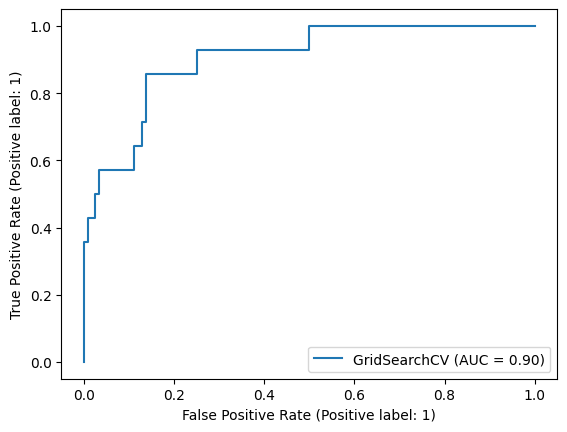

In [146]:
metrics.plot_roc_curve(gridsearch,x_test,y_test)

In [147]:

print(confusion_matrix(y_test, y_precept))
pd.crosstab(y_test, y_precept, rownames=['True'], colnames=['Predicted'], margins=True)

[[109   7]
 [  6   8]]


Predicted,0,1,All
True,,,
0,109,7,116
1,6,8,14
All,115,15,130


Apply RandomizedSearch Algorithms with the parameter_space below to start fitting the data and tune the hyperparameters

In [158]:

#cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
randomSearch = RandomizedSearchCV(mlp1, parameter_space, random_state=1)
randomSearch.fit(x_train, y_train)

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization has

RandomizedSearchCV(estimator=MLPClassifier(max_iter=100, random_state=1),
                   param_distributions={'activation': ['tanh', 'relu',
                                                       'logistic'],
                                        'alpha': [0.0001, 0.05],
                                        'hidden_layer_sizes': [(50, 50, 50),
                                                               (50, 100, 50),
                                                               (100,), (10, 10),
                                                               (15, 15)],
                                        'learning_rate': ['constant',
                                                          'adaptive'],
                                        'learning_rate_init': [0.01, 0.1, 0.001,
                                                               0.0001],
                                        'solver': ['sgd', 'adam']},
                   random_state=1)

In [159]:
print('Best parameters found:\n', randomSearch.best_params_)

Best parameters found:
 {'solver': 'adam', 'learning_rate_init': 0.1, 'learning_rate': 'adaptive', 'hidden_layer_sizes': (100,), 'alpha': 0.05, 'activation': 'relu'}


In [160]:
y_true1, y_precept1 = y_test , randomSearch.predict(x_test)
print('Results on the test set:')
print(classification_report(y_true1, y_precept1))

Results on the test set:
              precision    recall  f1-score   support

           0       0.90      0.97      0.94       116
           1       0.40      0.14      0.21        14

    accuracy                           0.88       130
   macro avg       0.65      0.56      0.57       130
weighted avg       0.85      0.88      0.86       130



In [161]:
print("Accuracy:",metrics.accuracy_score(y_test, y_precept1))
print("ROC CURVE :",metrics.roc_auc_score(y_test, y_precept1))

Accuracy: 0.8846153846153846
ROC CURVE : 0.5584975369458128


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


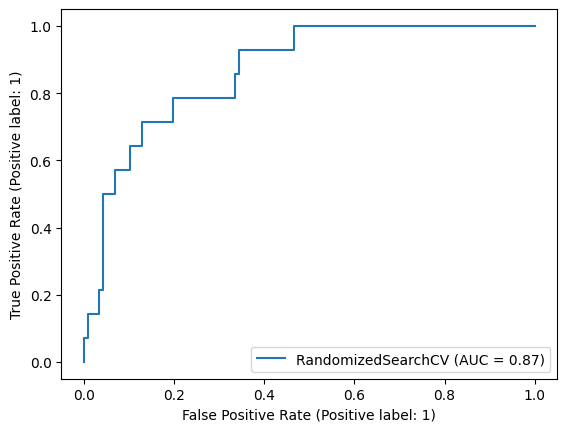

In [162]:
metrics.plot_roc_curve(randomSearch,x_test,y_test)

In [163]:

print(confusion_matrix(y_test, y_precept1))
pd.crosstab(y_test, y_precept1, rownames=['True'], colnames=['Predicted'], margins=True)

[[113   3]
 [ 12   2]]


Predicted,0,1,All
True,,,
0,113,3,116
1,12,2,14
All,125,5,130
